In [65]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import warnings

# Suppress all warning messages
warnings.filterwarnings("ignore")

# Your code here

# Reset the warning filter to its default state
warnings.filterwarnings("default")


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/content/gld_price_data.csv")

In [9]:
#Print the first 5 rows of the data
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#Finiding the shape of the data

In [5]:
df.shape

(2290, 6)

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


from matplotlib import pyplot as plt
_df_0['SPX'].plot(kind='hist', bins=20, title='SPX')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GLD'].plot(kind='hist', bins=20, title='GLD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['USO'].plot(kind='hist', bins=20, title='USO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SLV'].plot(kind='hist', bins=20, title='SLV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SPX', y='GLD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='GLD', y='USO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='USO', y='SLV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SLV', y='EUR/USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['SPX'].plot(kind='line', figsize=(8, 4), title='SPX')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['GLD'].plot(kind='line', figsize=(8, 4), title='GLD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['USO'].plot(kind='line', figsize=(8, 4), title='USO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['SLV'].plot(kind='line', figsize=(8, 4), title='SLV')
plt.gca().spines[['top', 'right']].set_visible(False)

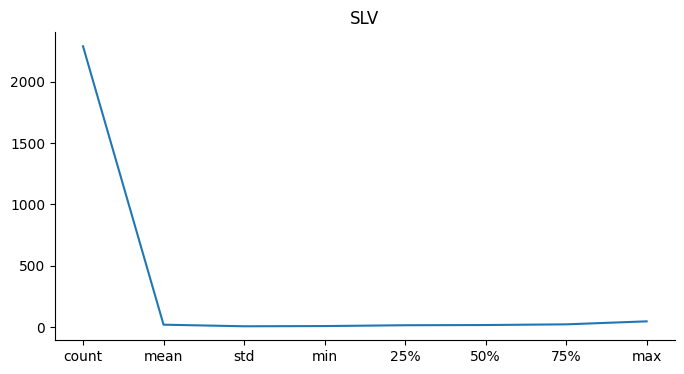

In [13]:
from matplotlib import pyplot as plt
_df_11['SLV'].plot(kind='line', figsize=(8, 4), title='SLV')
plt.gca().spines[['top', 'right']].set_visible(False)

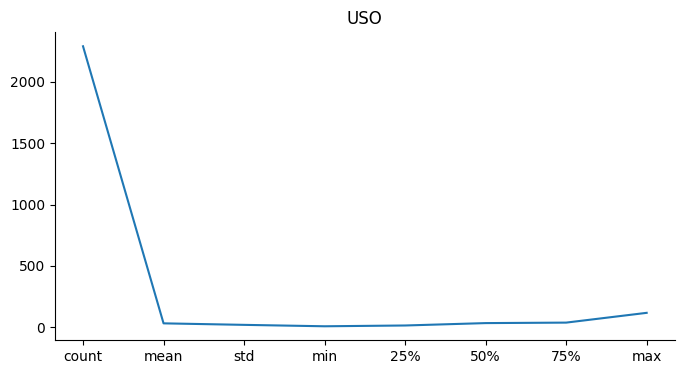

In [14]:
from matplotlib import pyplot as plt
_df_10['USO'].plot(kind='line', figsize=(8, 4), title='USO')
plt.gca().spines[['top', 'right']].set_visible(False)

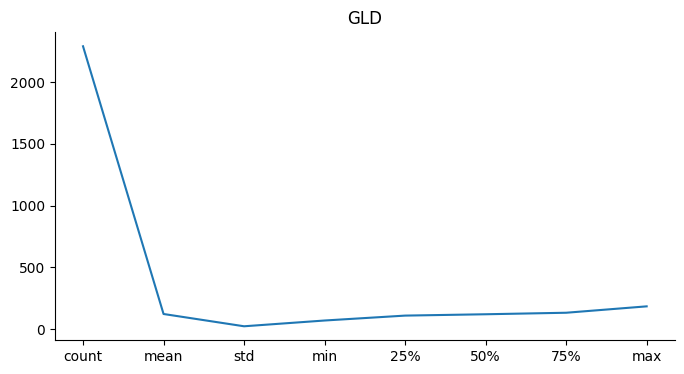

In [12]:
from matplotlib import pyplot as plt
_df_9['GLD'].plot(kind='line', figsize=(8, 4), title='GLD')
plt.gca().spines[['top', 'right']].set_visible(False)

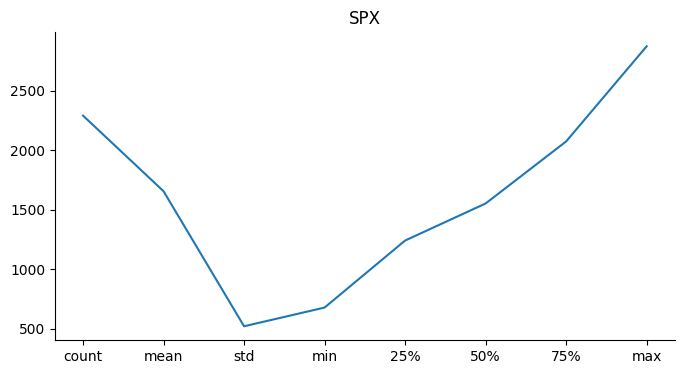

In [10]:
from matplotlib import pyplot as plt
_df_8['SPX'].plot(kind='line', figsize=(8, 4), title='SPX')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
#Checkking the null values

In [16]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [28]:
#Correlation
correlation = df.corr()
correlation

<ipython-input-28-a2d3929f5b2e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [22]:
#Construction heat map

<Axes: >

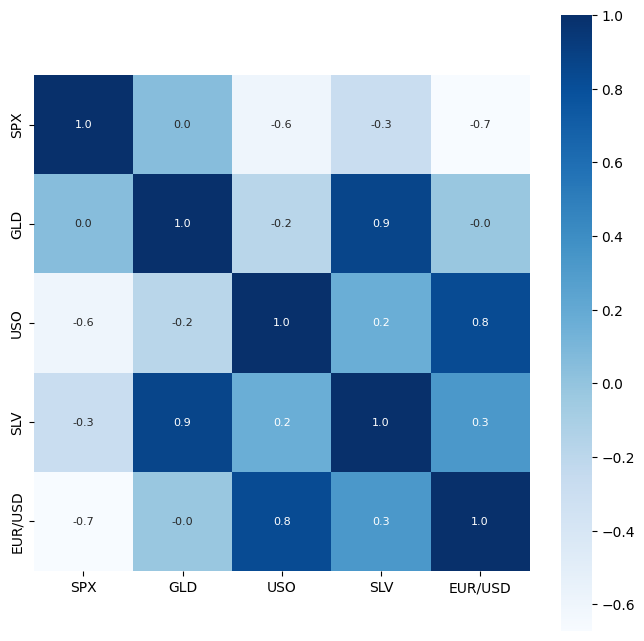

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar =True, square = True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [24]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [25]:
print(correlation['SLV'])

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


<ipython-input-29-543e463df9d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

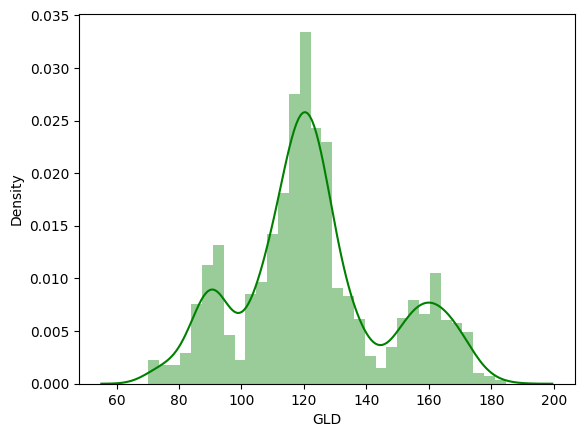

In [29]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')

Splittig the data to features and output

In [31]:
X = df.drop(['Date','GLD'], axis = 1)
Y = df['GLD']

In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data Standardization



In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
scaler.fit(X)

StandardScaler()

In [60]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.39914541  2.38880956 -0.6917197   1.42975293]
 [-0.39914541  2.38368652 -0.67691224  1.45103511]
 [-0.46760428  2.32938091 -0.69355301  1.45864621]
 ...
 [ 2.05926403 -0.89307824 -0.61274655 -0.69876145]
 [ 2.0728668  -0.89461519 -0.63813078 -0.68838269]
 [ 2.06448555 -0.89329341 -0.65305106 -0.77266741]]


In [61]:
X = standardized_data

Y = df['GLD']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training: Random Forest

In [35]:
# Import necessary libraries
from sklearn.model_selection import train_test_split


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
regressor = RandomForestRegressor(n_estimators=100)

# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [71]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [72]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  -4.161374385722513


Compare the Actual Values and Predicted Values in a Plot

In [47]:
Y_test = list(Y_test)


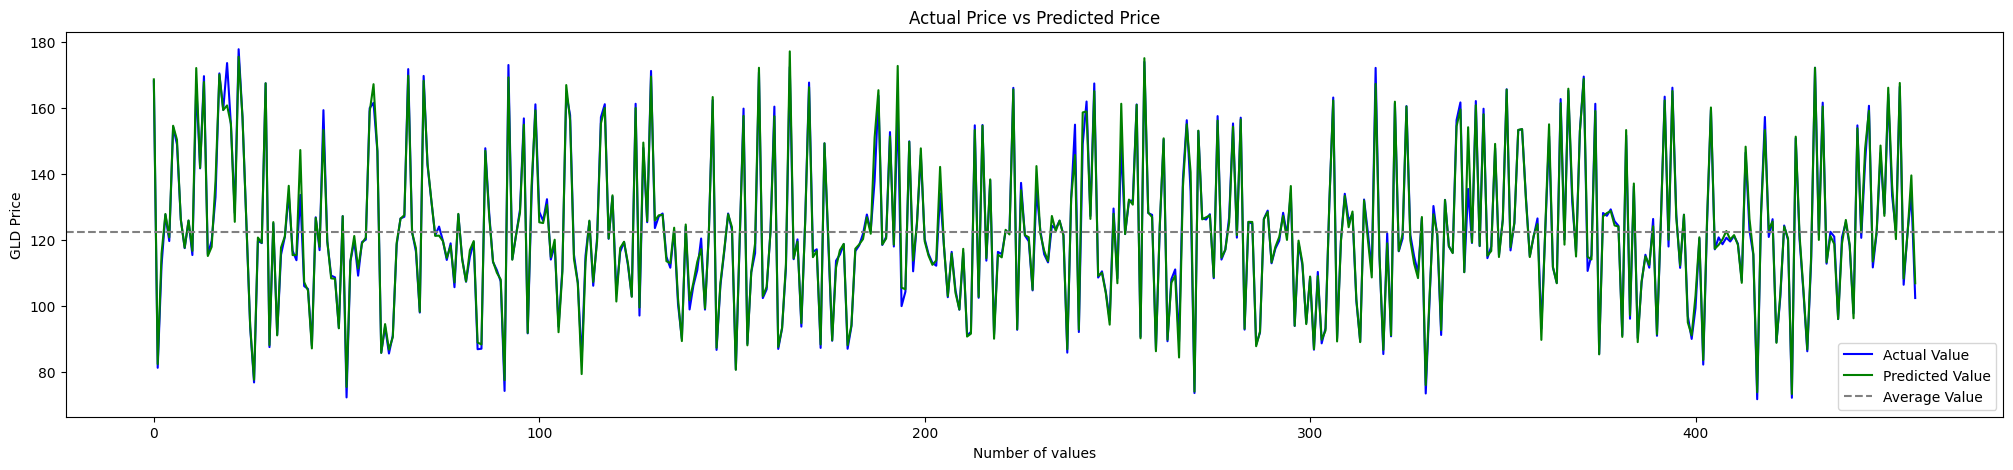

In [55]:
plt.figure(figsize = (25,5))

plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')

# Calculate the average of Y_test
average_value = np.mean(Y_test)

# Plot the average line
plt.axhline(y=average_value, color='grey', linestyle='--', label='Average Value')

plt.legend()
plt.show()

In [73]:
#Making a prediction


In [77]:
input_data = (1447.1,78.47,15.18,1.471692)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-0.39926108  2.38880951 -0.6917197   1.42975293]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
prediction = regressor.predict(std_data)
print(prediction)

[76.83869876]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#Save the Training Model

In [88]:
import pickle
filename ='trained_model_gold.sav'
pickle.dump(regressor, open(filename,'wb'))

<ipython-input-88-32af19c34033>:3: ResourceWarning: unclosed file <_io.BufferedWriter name='trained_model_gold.sav'>
  pickle.dump(regressor, open(filename,'wb'))


Loading the saved model

In [89]:
loaded_model =  pickle.load(open('trained_model_gold.sav','rb'))

<ipython-input-89-ea1fd8706705>:1: ResourceWarning: unclosed file <_io.BufferedReader name='trained_model_gold.sav'>
  loaded_model =  pickle.load(open('trained_model_gold.sav','rb'))
